In [1]:
from pathlib import Path
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 9]

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

train_df['year'] = train_df['date']//10000
test_df['year'] = test_df['date']//10000
train_df['month'] = train_df['date'].apply(lambda x: int(str(x)[4:6]))
test_df['month'] = test_df['date'].apply(lambda x: int(str(x)[4:6]))

kinds = test_df['kind'].unique()
print(train_df.shape)
train_df = train_df[train_df['kind'].isin(kinds)]
print(train_df.shape)

all_df = pd.concat([train_df, test_df]).reset_index(drop=True)
all_df.drop('weekno', axis=1, inplace=True)
max_days = (datetime(2022, 12, 31) - datetime(2005, 1, 1)).days

dum_data = []

for i in range(max_days+1):
    date = datetime(2005, 1, 1) + timedelta(days=i)
    y, wn = date.isocalendar()[0], date.isocalendar()[1]
    date = int(date.strftime('%Y%m%d'))
    m = int(str(date)[4:6])
    dum_data.append(['ダミー', date, 0, 0, 'ダミー', y, m]) #kind, date, amount, mode_price, area, year, month

dum_df = pd.DataFrame(dum_data, columns=all_df.columns)

vis_df = pd.concat([all_df, dum_df])
vis_df = vis_df.query('20161101 <= date <= 20221031').reset_index(drop=True)
vis_df = pd.pivot_table(vis_df, index='date', columns='kind', values='mode_price').reset_index()
vis_df.fillna(0, inplace=True)
vis_df.head()

(77751, 8)
(61214, 8)


kind,date,かぼちゃ,きゅうり,さといも,たまねぎ,だいこん,なましいたけ,にんじん,ねぎ,はくさい,ほうれんそう,キャベツ,ダミー,トマト,ピーマン,ミニトマト,レタス
0,20161101,2808.0,2430.0,2376.0,1836.0,1404.0,173.0,2808.0,1620.0,1728.0,130.0,2592.0,0.0,2268.0,86.0,237.5,2700.0
1,20161102,2052.0,2484.0,3078.0,1836.0,1512.0,173.0,2808.0,1512.0,1836.0,140.0,2592.0,0.0,2376.0,86.0,237.5,2700.0
2,20161103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20161104,2106.0,2592.0,3024.0,1512.0,1512.0,173.0,2916.0,1728.0,2160.0,140.0,2592.0,0.0,2376.0,86.0,237.5,2268.0
4,20161105,1998.0,2538.0,2376.0,1836.0,1458.0,173.0,2700.0,1944.0,2700.0,135.0,2592.0,0.0,2376.0,86.0,243.0,2376.0


In [3]:
df = vis_df.copy()
df['year'] = df['date']//10000
df['month'] = df['date'].apply(lambda x: int(str(x)[4:6]))
df = df[(2017 <= df['year']) & (df['year'] <= 2021)].reset_index(drop=True)
df.index = pd.to_datetime(df['date'], format='%Y%m%d')
df = df.drop(columns='date')
df_month = df.groupby(['year', 'month']).mean()

df_month.index = ['_'.join([str(x) for x in idx]) for idx in  df_month.index.values]
df

kind,かぼちゃ,きゅうり,さといも,たまねぎ,だいこん,なましいたけ,にんじん,ねぎ,はくさい,ほうれんそう,キャベツ,ダミー,トマト,ピーマン,ミニトマト,レタス,year,month
date,,,,,,,,,,,,,,,,,,
2017-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2017,1
2017-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2017,1
2017-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2017,1
2017-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2017,1
2017-01-05,0.0,1836.0,2322.0,1836.0,972.0,248.0,1404.0,1944.0,1296.0,113.5,1188.0,0.0,1512.0,97.0,205.50,1620.0,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,3942.0,2052.0,2916.0,5184.0,1026.0,119.0,1080.0,1512.0,648.0,70.5,540.0,0.0,1620.0,65.0,151.50,2916.0,2021,12
2021-12-28,0.0,2160.0,2052.0,5184.0,864.0,129.5,1768.5,1728.0,540.0,102.5,918.0,0.0,1512.0,65.0,137.75,3024.0,2021,12
2021-12-29,1728.0,1944.0,1971.0,5184.0,1242.0,145.5,1404.0,1728.0,702.0,113.5,648.0,0.0,1620.0,65.0,140.50,3348.0,2021,12


かぼちゃ


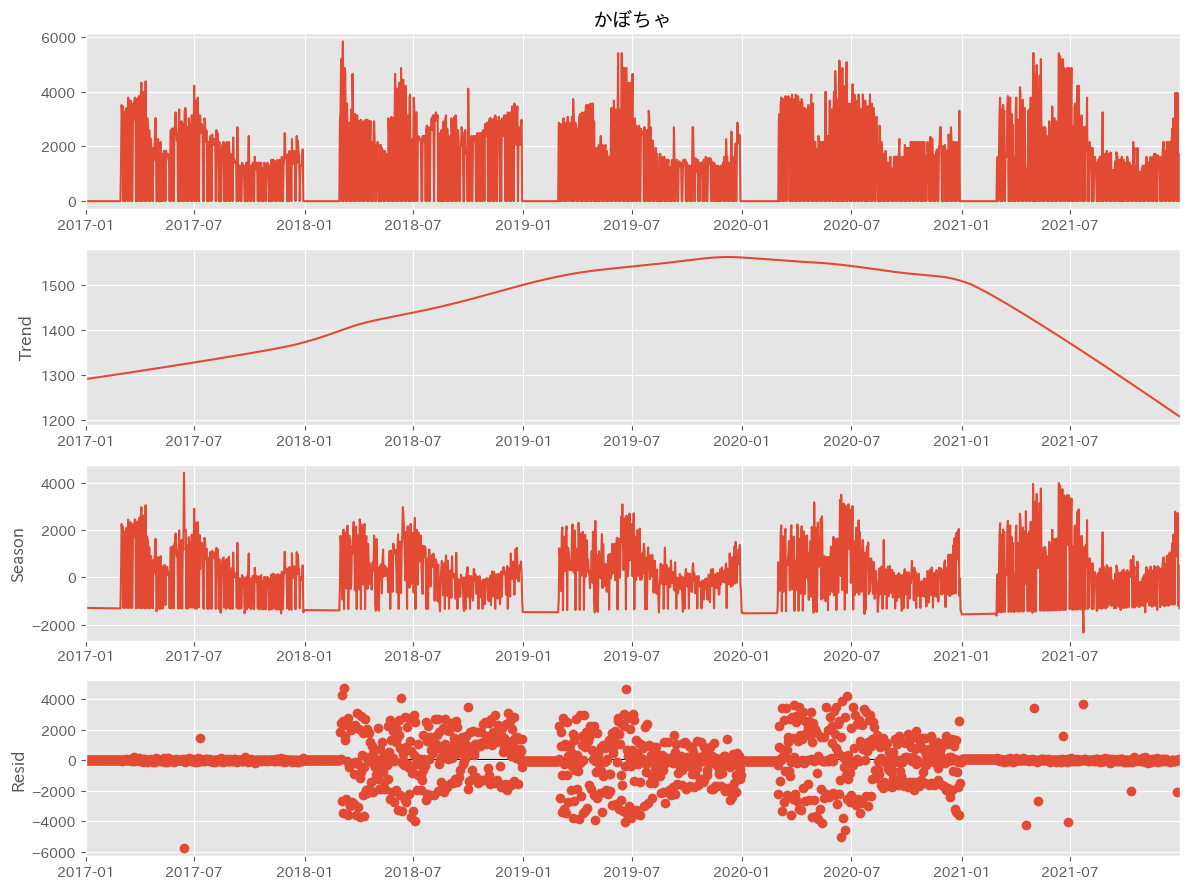

きゅうり


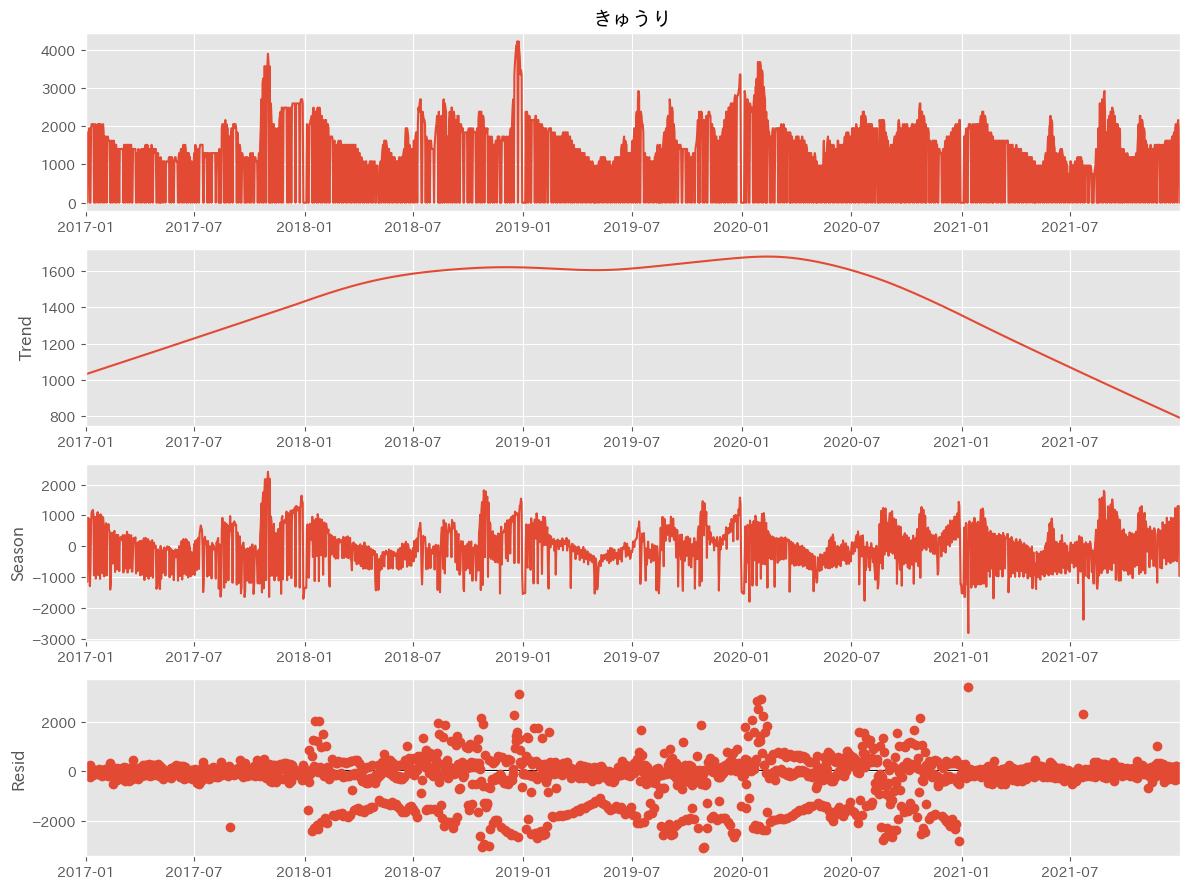

さといも


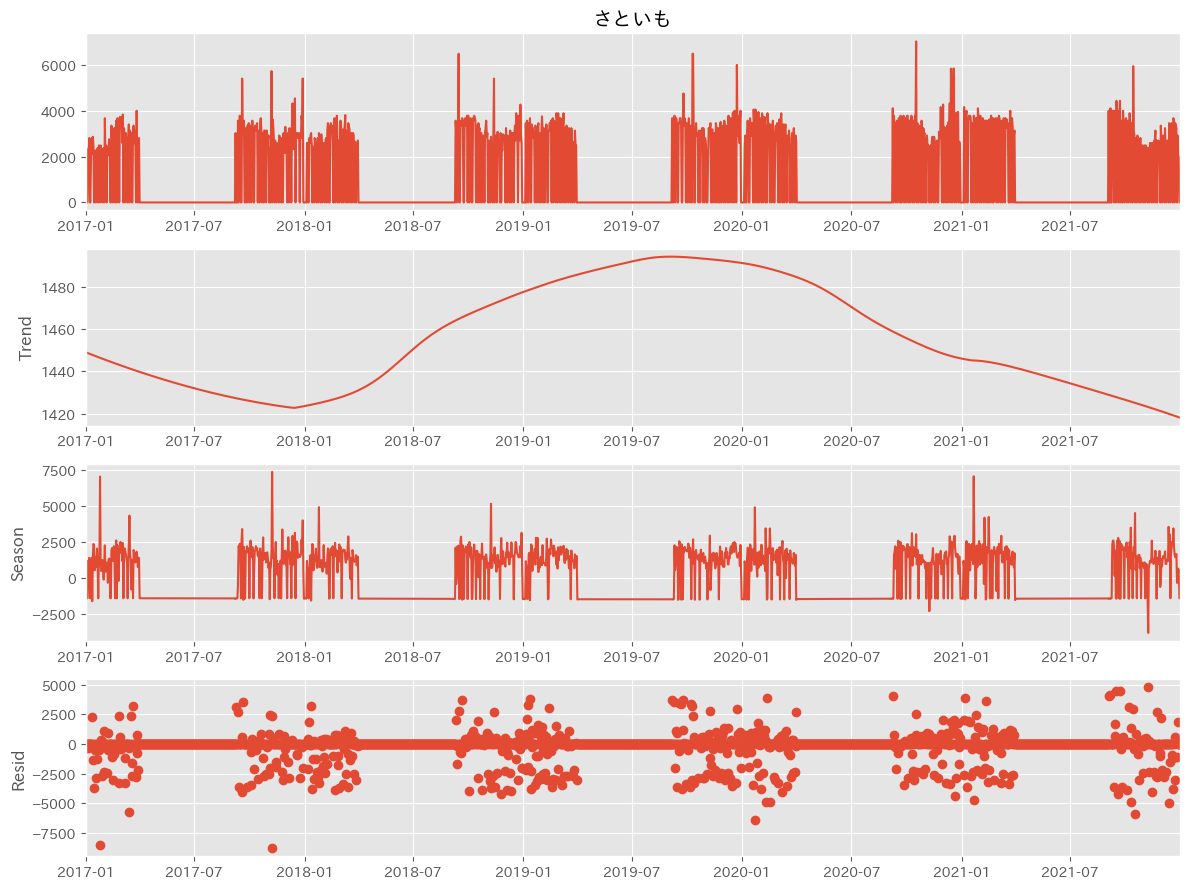

たまねぎ


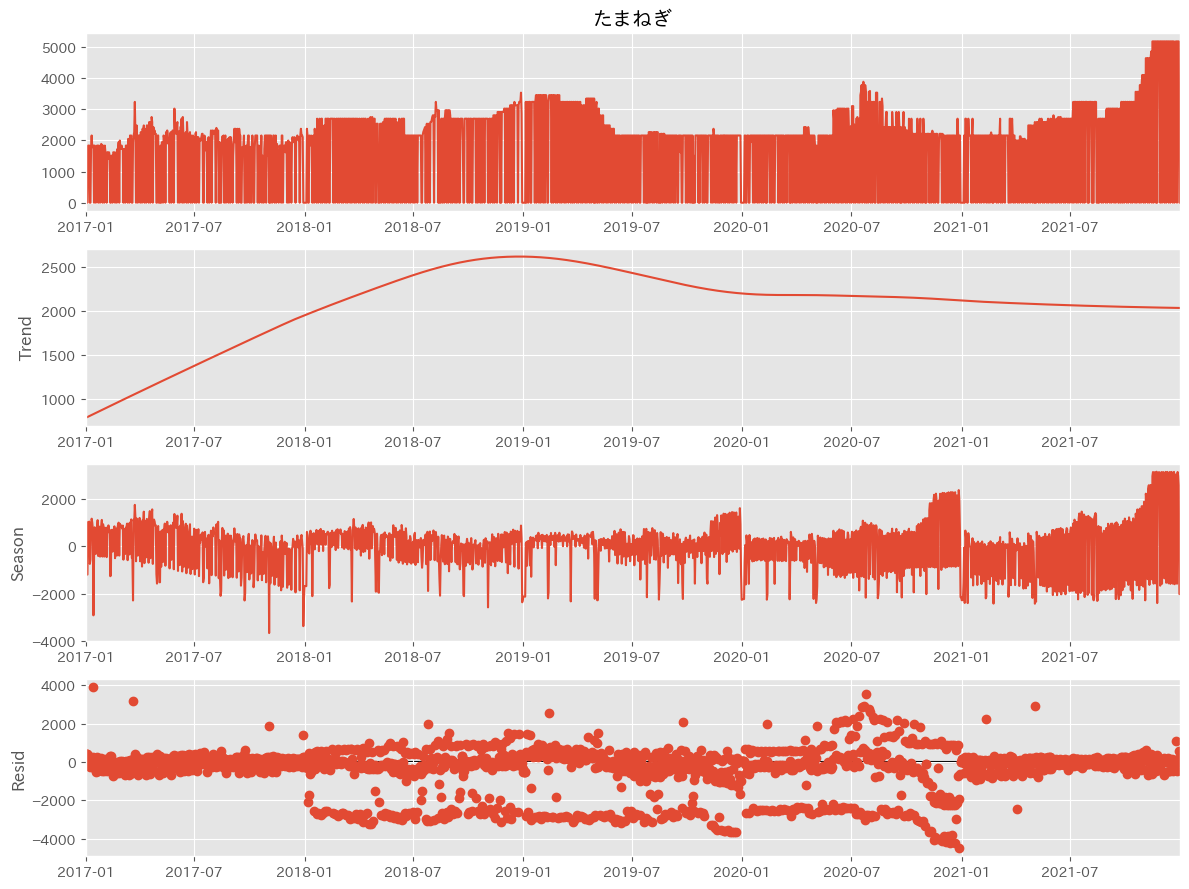

だいこん


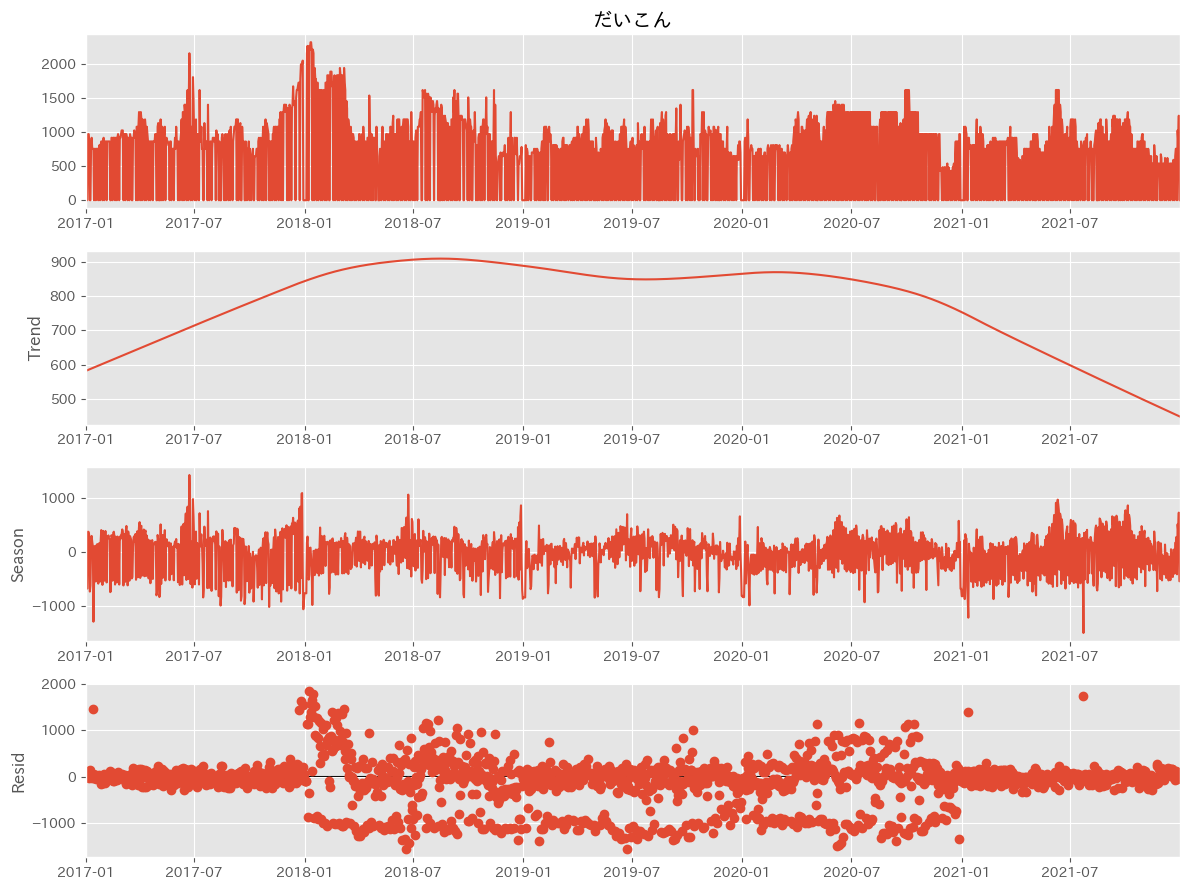

なましいたけ


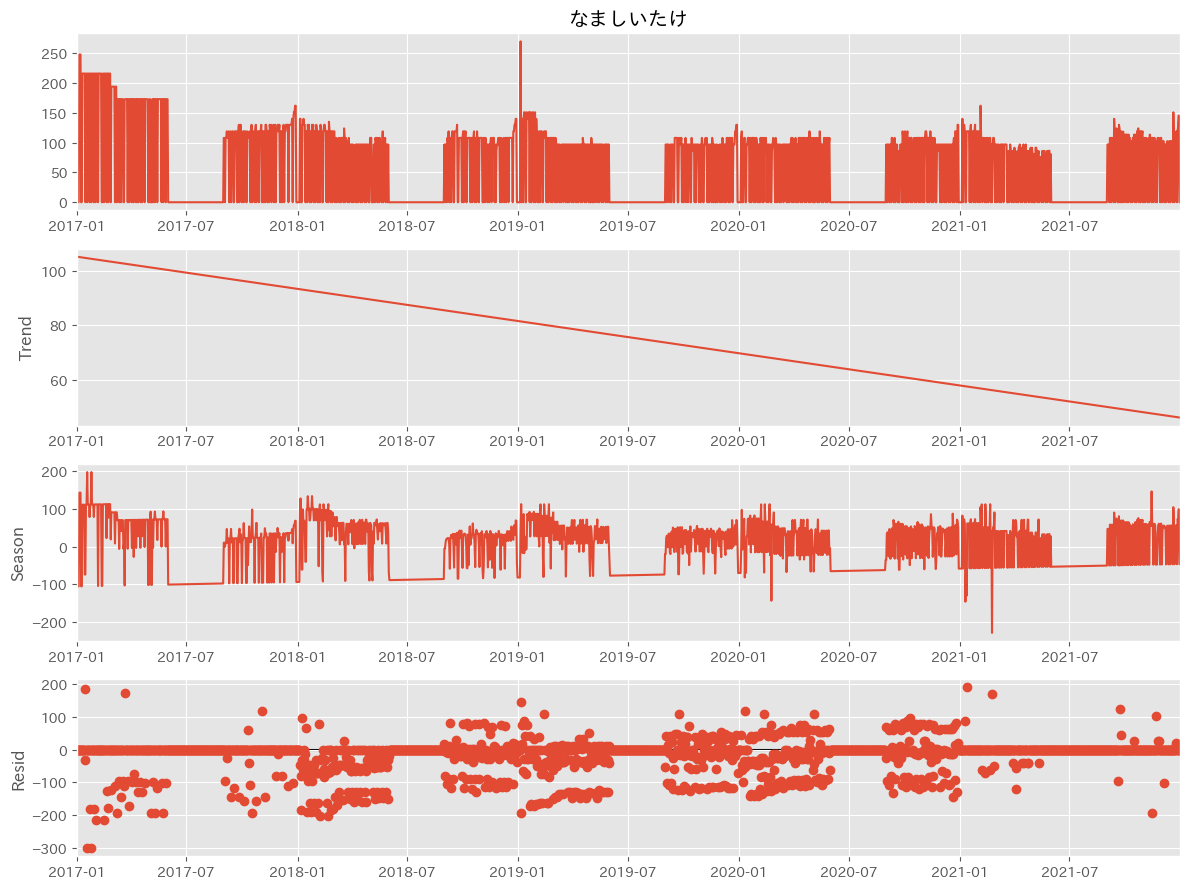

にんじん


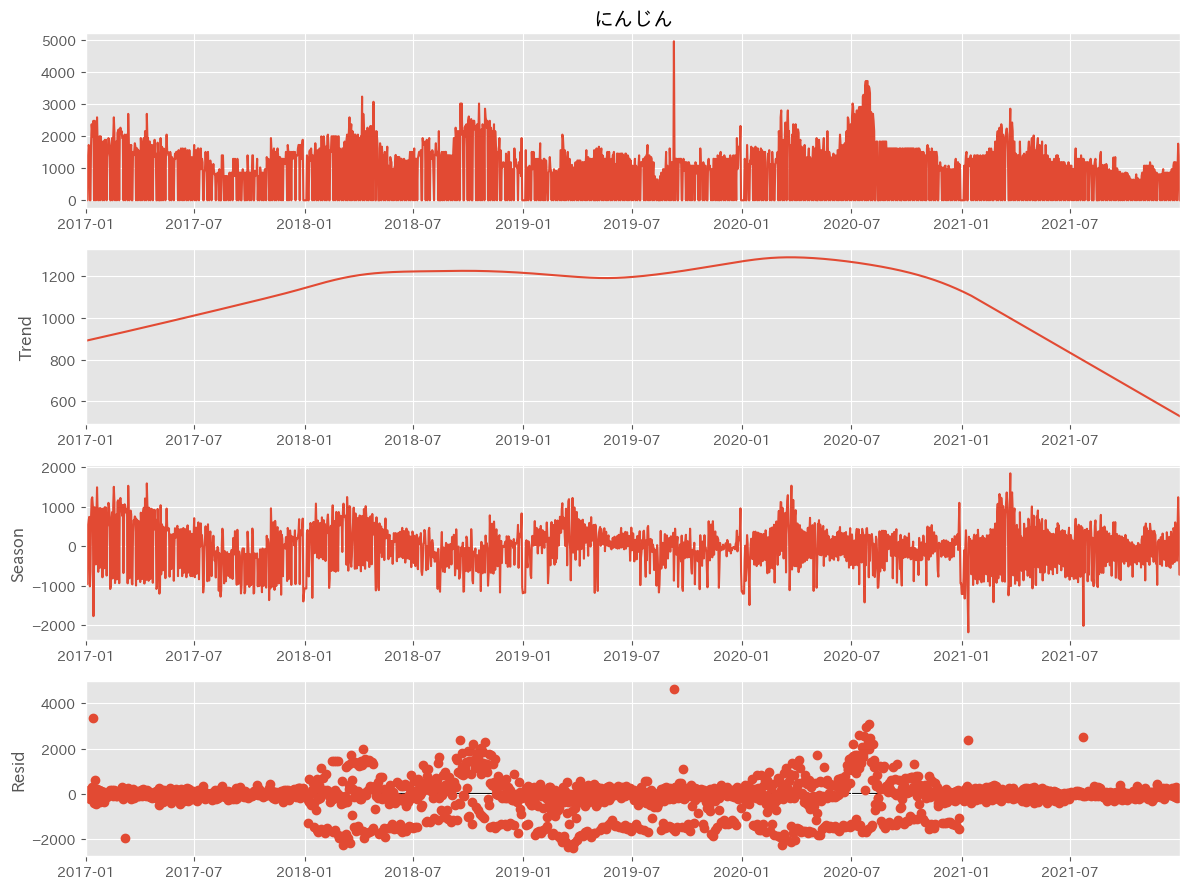

ねぎ


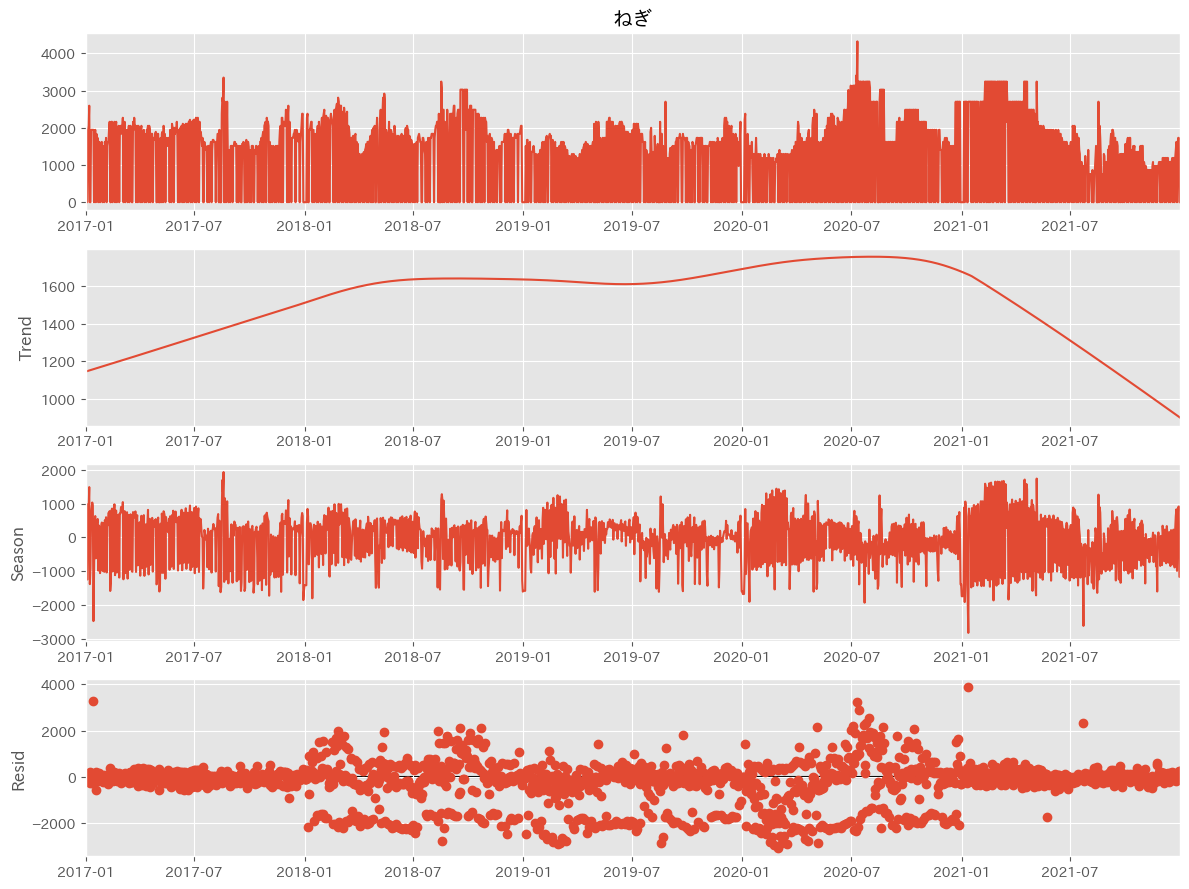

はくさい


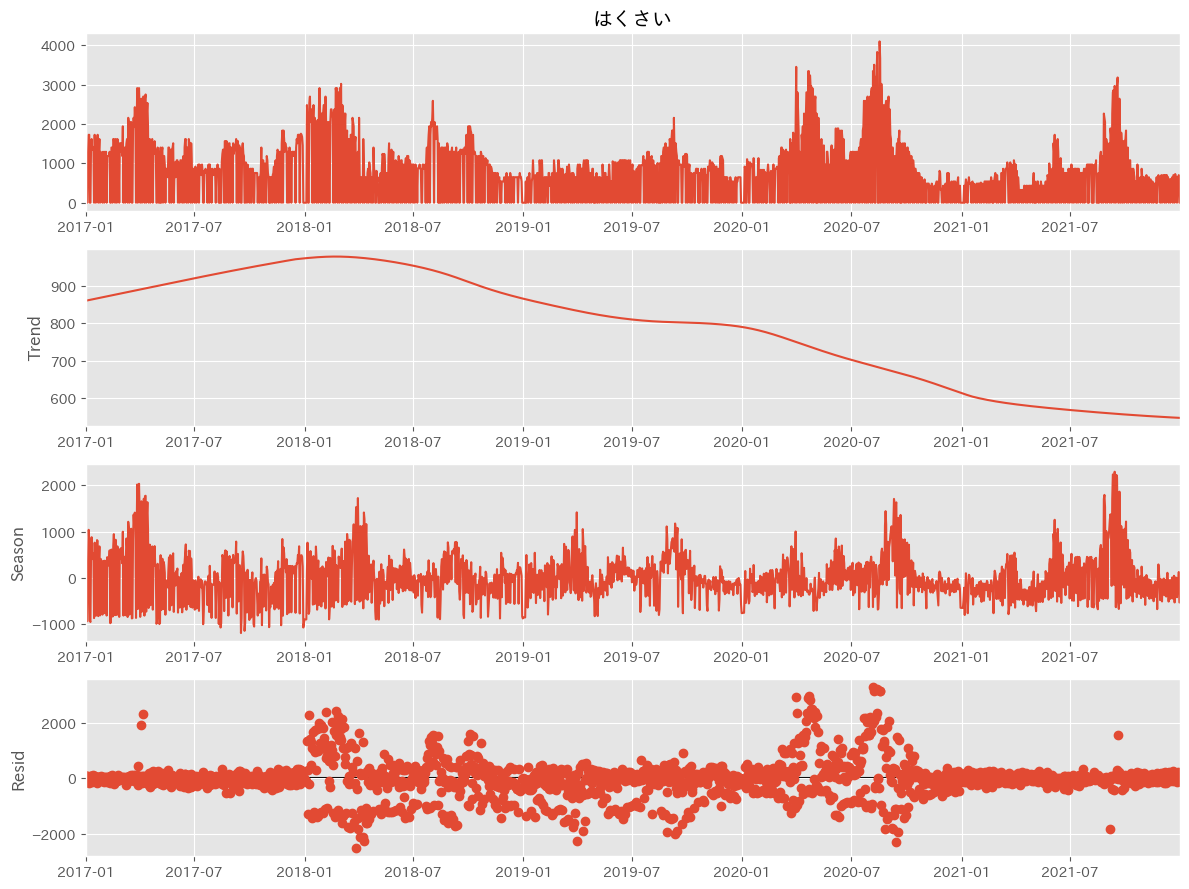

ほうれんそう


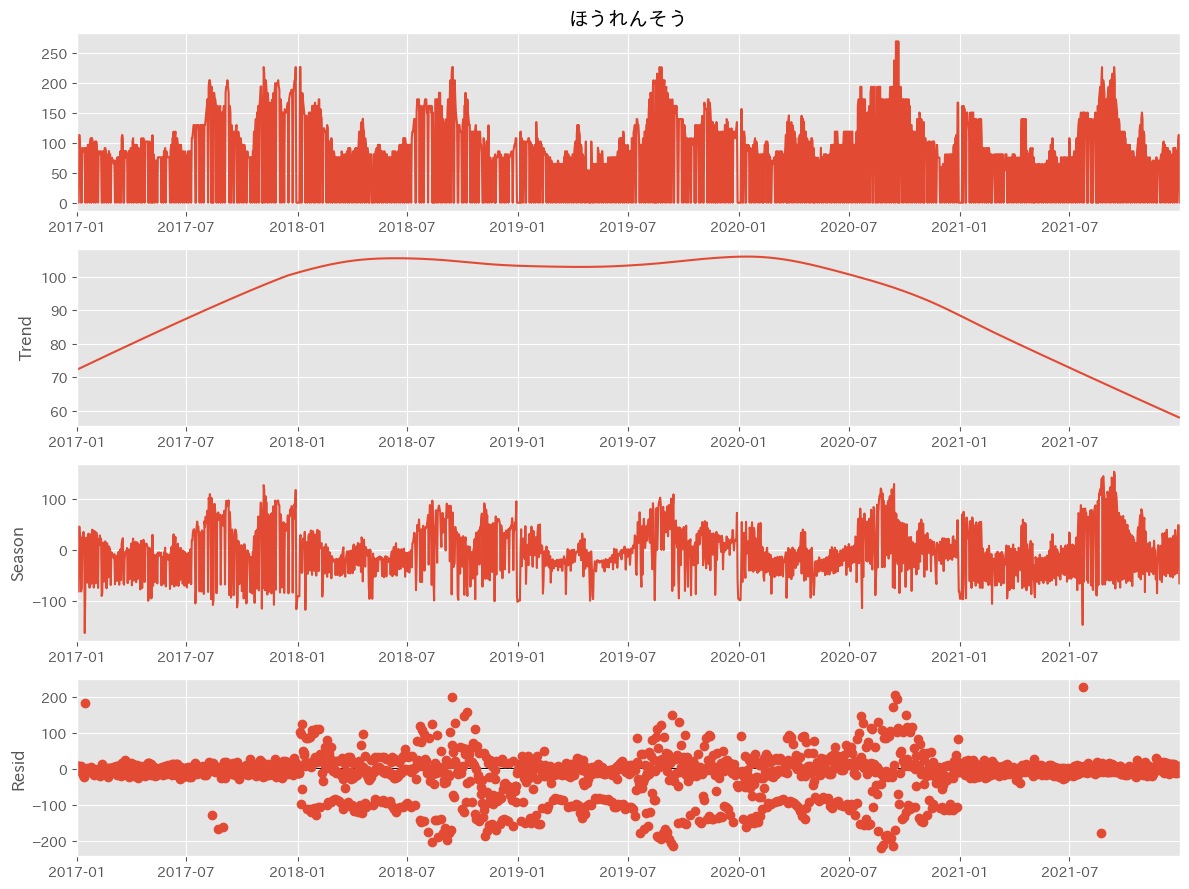

キャベツ


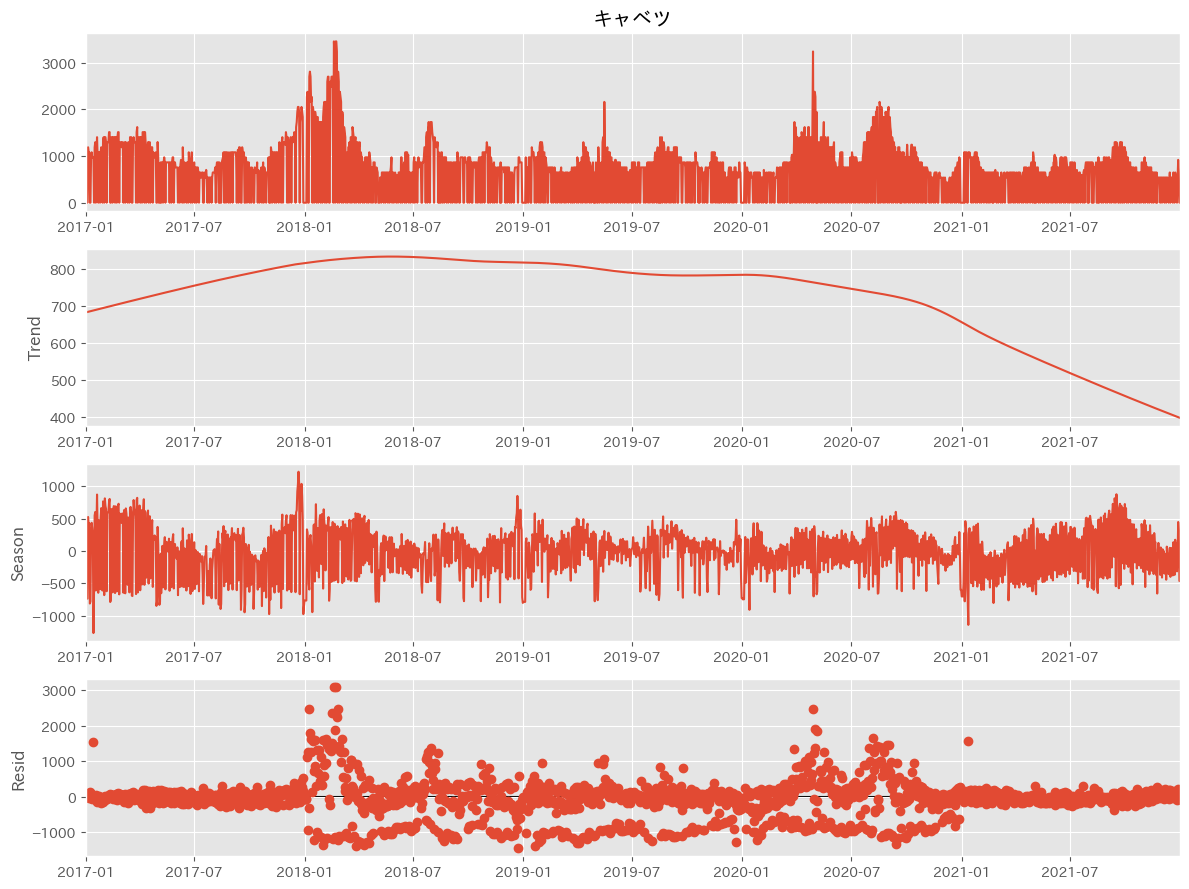

ダミー


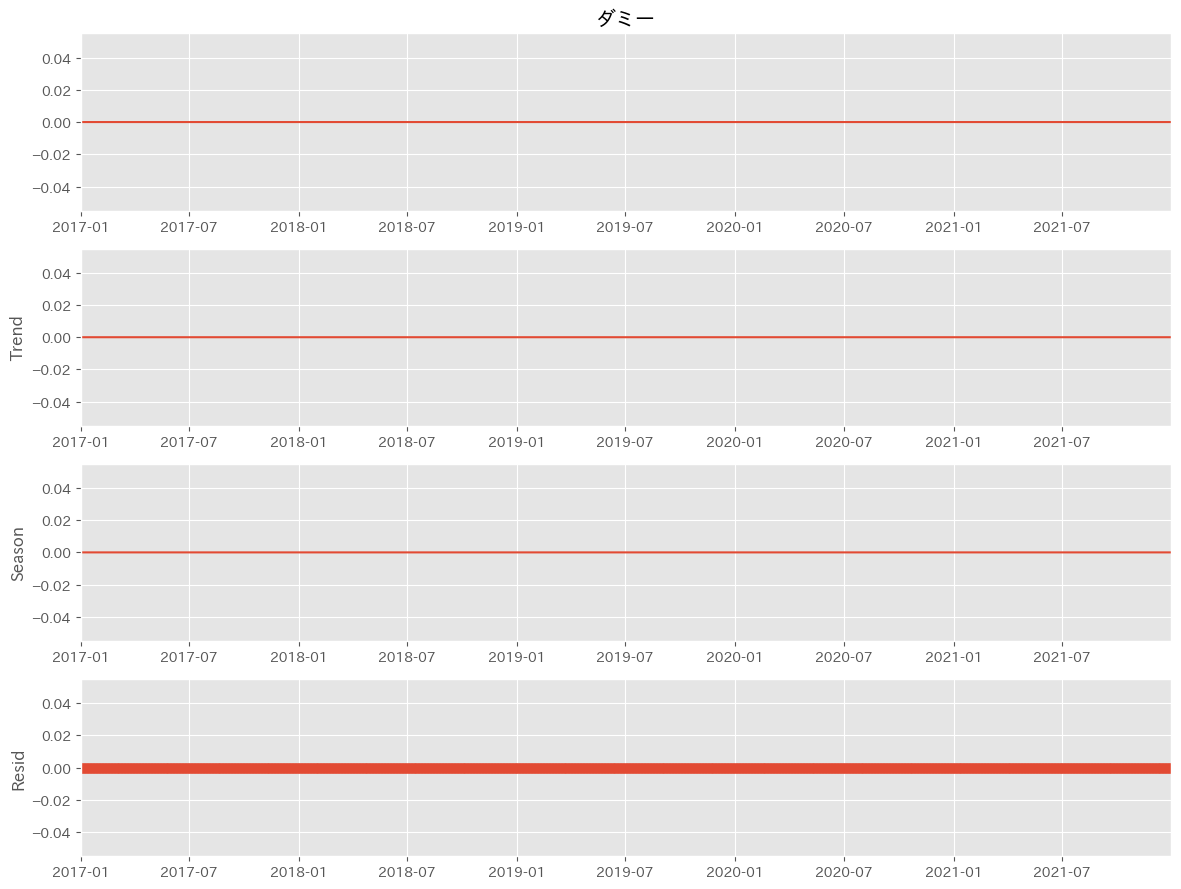

トマト


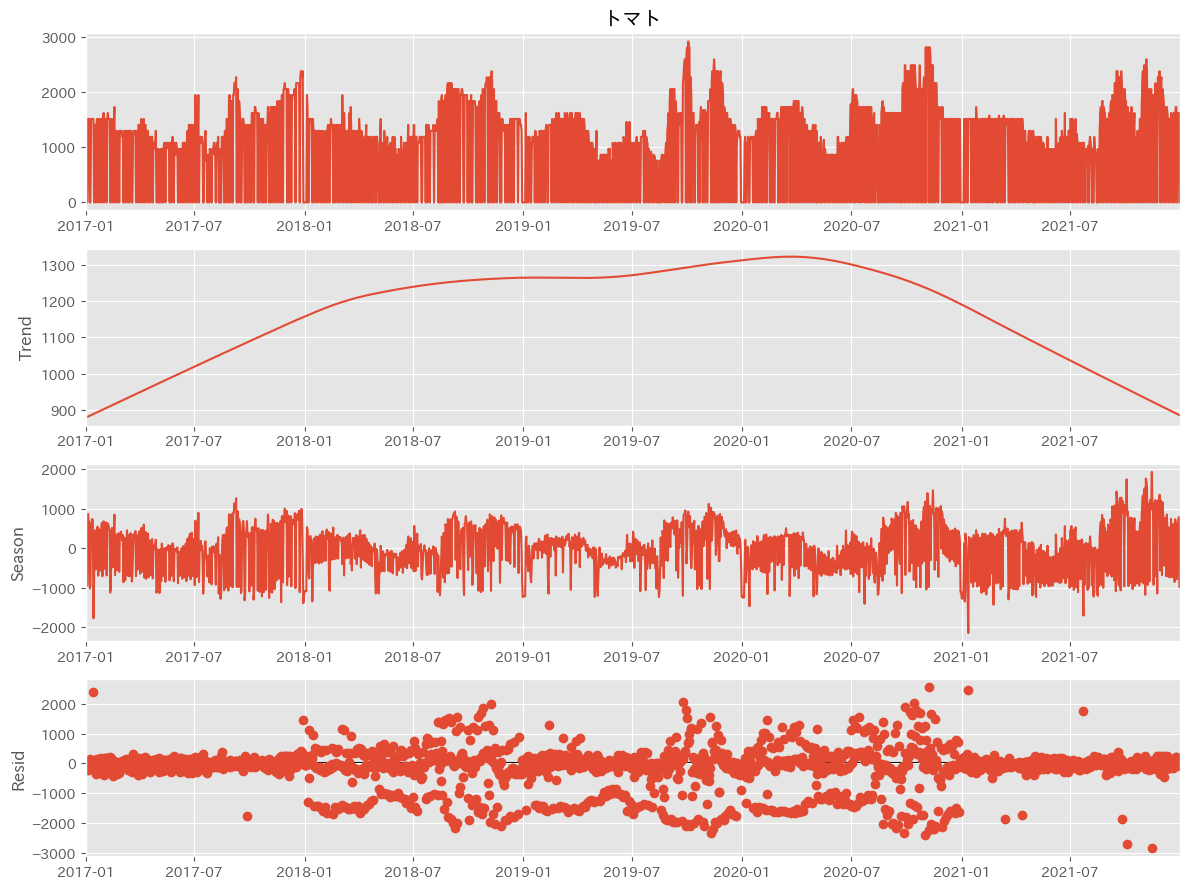

ピーマン


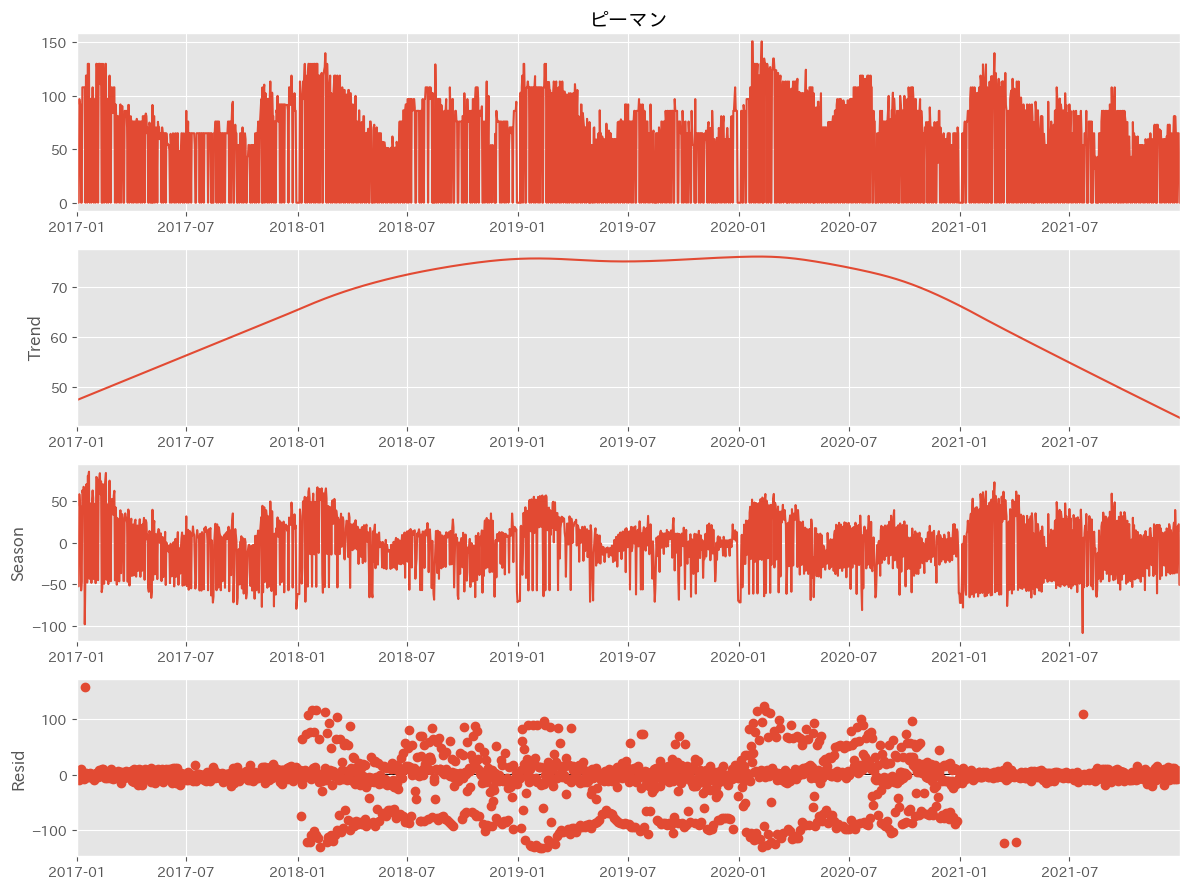

ミニトマト


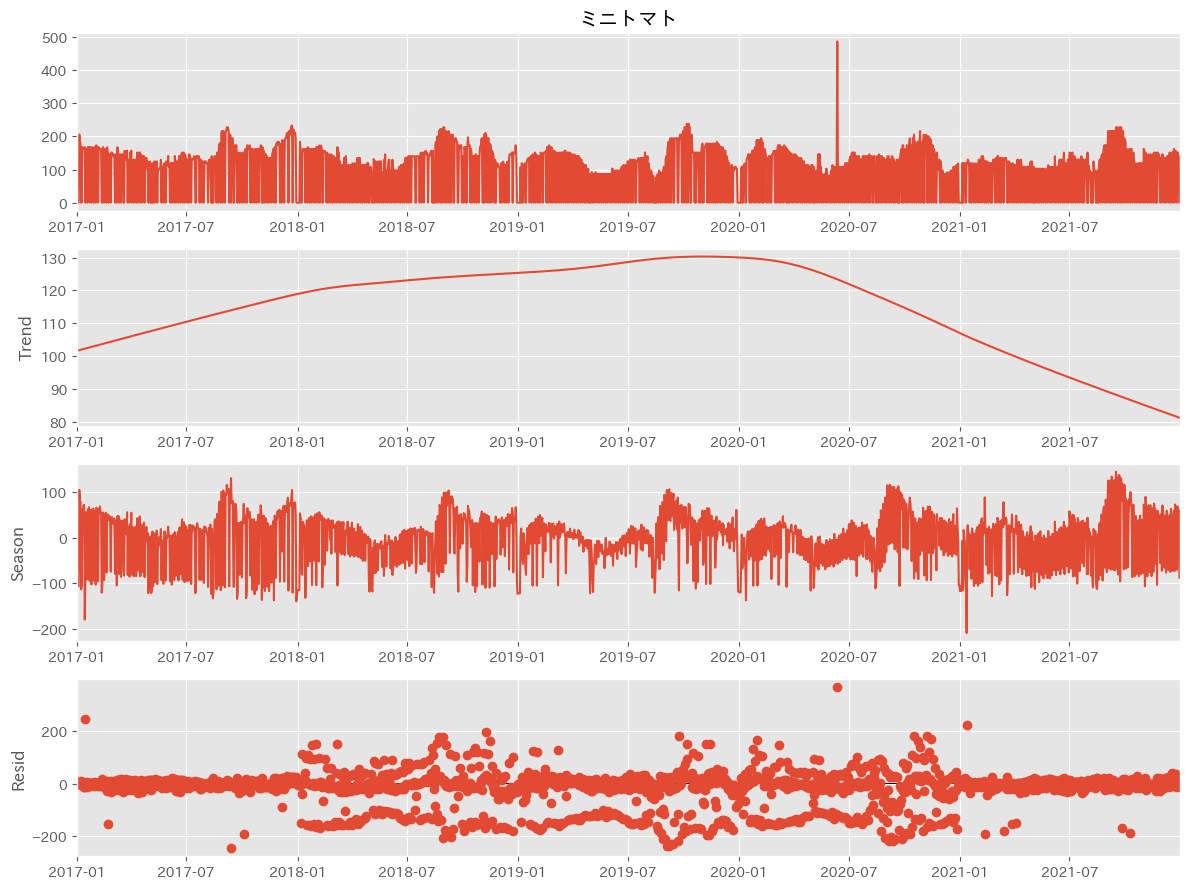

レタス


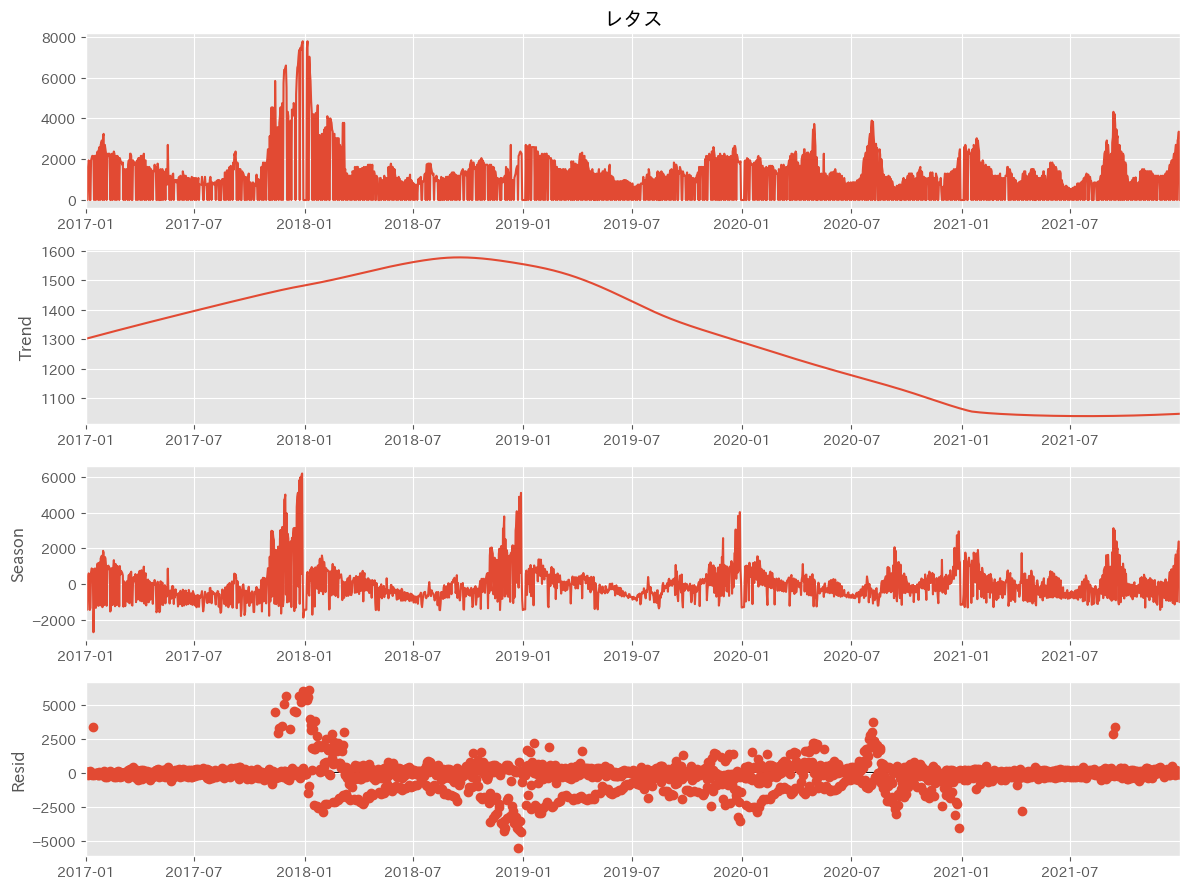

year


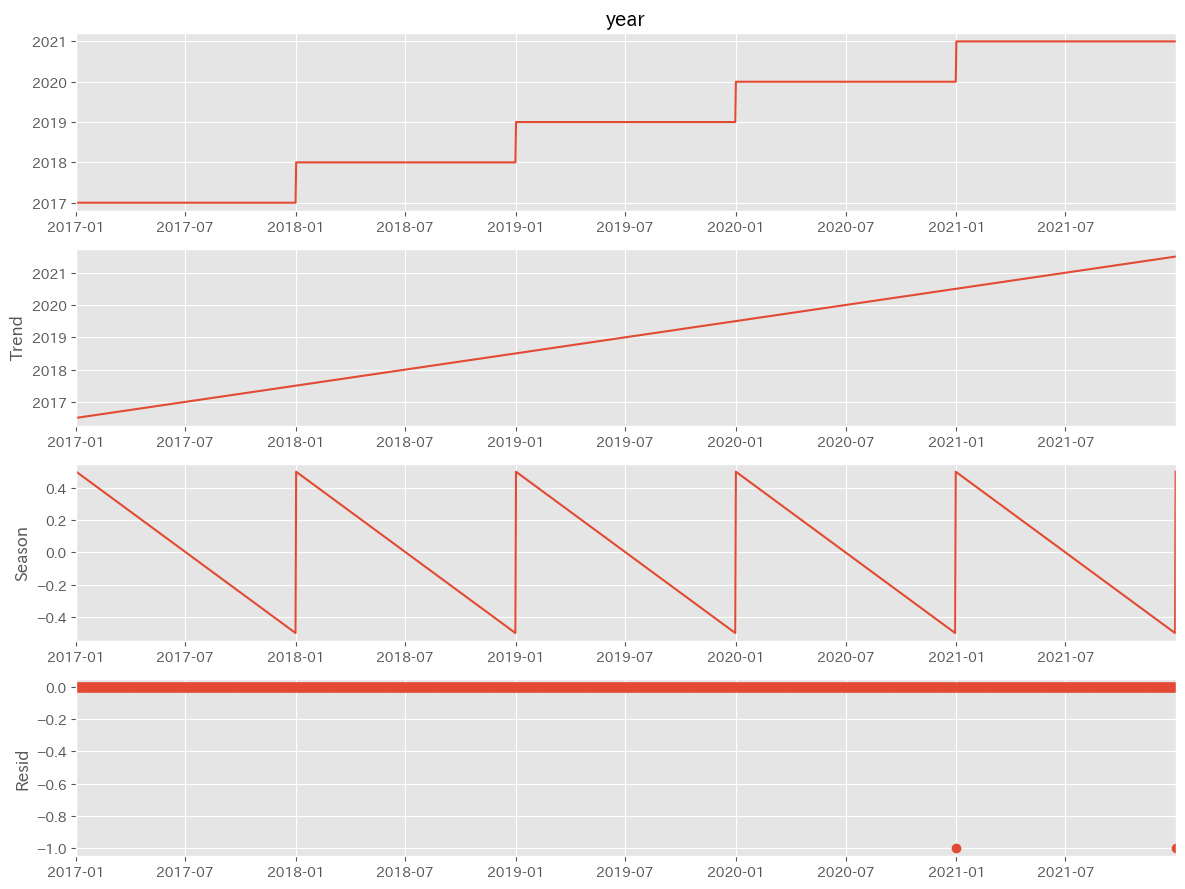

month


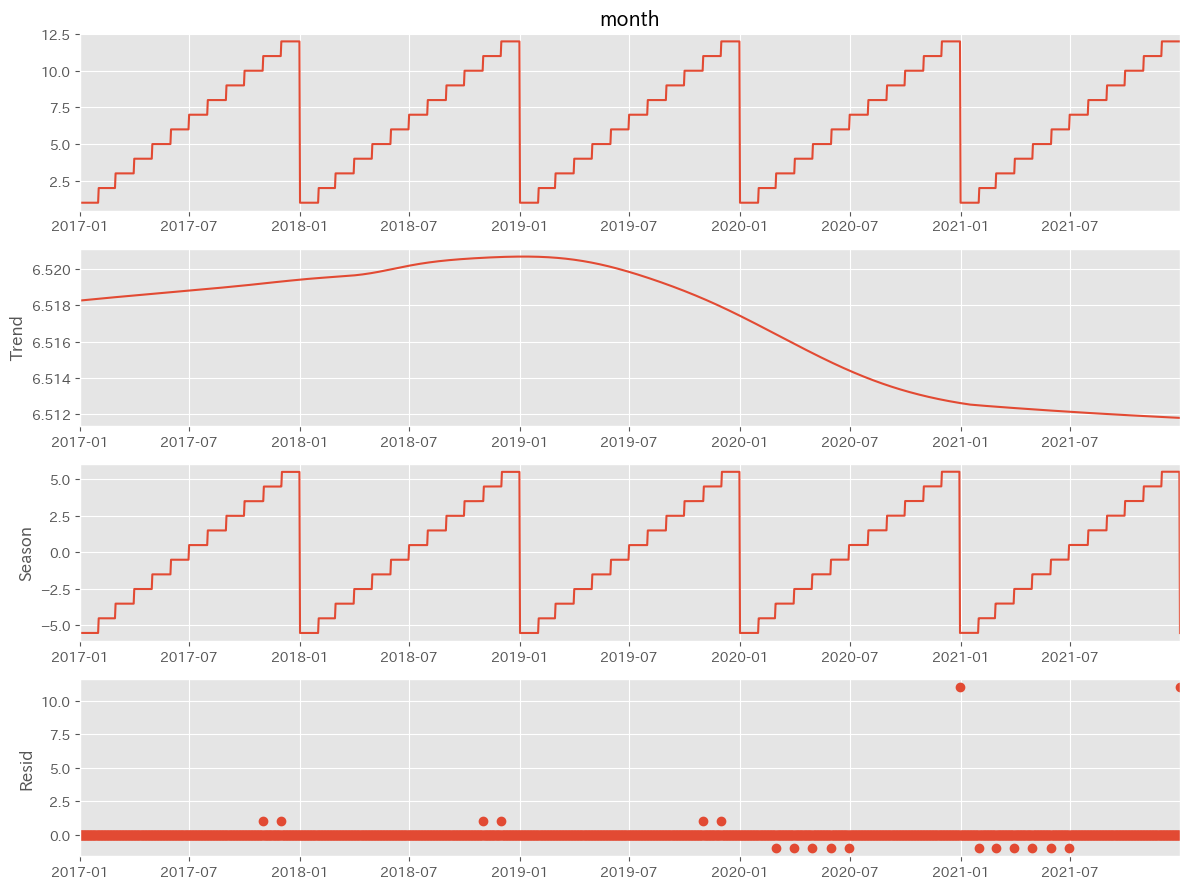

In [4]:
from statsmodels.tsa.seasonal import STL 

# df = df.query("year == 2017 or year == 2018" )
for col in df.columns:
    print(col)
    #STL分解
    # stl=STL(df[col], period=12, robust=True)
    stl=STL(df[col], period=365, robust=True)

    stl_series = stl.fit()

    # STL分解結果のグラフ化
    stl_series.plot()
    plt.show()

    # STL分解結果のデータ
    # stl_o = stl_series.observed #観測データ（STL分解前の元のデータ）＝トレンド＋季節性＋残差
    # stl_t = stl_series.trend    #トレンド（trend）
    # stl_s = stl_series.seasonal #季節性（seasonal）
    # stl_r = stl_series.resid    #残差（resid）

    # stl_t.plot()                                       #トレンド（trend）のグラフ描写
    # stl_s.plot()                                       #季節性（season）のグラフ描写
    # stl_r.plot()                                       #残差（resid）のグラフ描写
    # plt.title('Passengers')                            #グラフタイトル
    # plt.ylabel('Monthly Number of Airline Passengers') #タテ軸のラベル
    # plt.xlabel('Month')                                #ヨコ軸のラベル
    # plt.legend()                                       #凡例表示
    # plt.show()